# OSEMN DS Model

<hr style="border:1px solid gray"> </hr>

## Business Problem


<img src="images/top_rated_movies.jpg" style="width:400px;height:170px"/>


USAA wants to determine what factors should affect their home insurance premiums. In this project, regression models will analyze which home features (square footage, condition, etc.) best predict a house prices. The model will be trained and tested to see how well the model predicts house prices. Then, recommendations will be made to determine which features should raise, lower, or not affect premiums.

<hr style="border:1px solid gray"> </hr>

## Obtain Data
- Understand stakeholder requirements
- Gather information on the problem
- Source data necessary for the problem

**Business Problem:** 

In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [79]:
df = pd.read_csv('data/kc_house_data.csv')
pd.set_option('display.max_columns', 25) #view all columns
print(df.shape)
df.head()

(21597, 21)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

**Column Names and descriptions for Kings County Data Set**
* **id** - unique identifier for a house
* **date** - date house was sold
* **price** - price: prediction target
* **bedrooms** - number of Bedrooms/House
* **bathrooms** - number of bathrooms/bedrooms
* **sqft_living** - sqft footage of the home
* **sqft_lot** - sqft footage of the lot
* **floors** - total floors (levels) in house
* **waterfront** - house has a view to a waterfront
* **view** - has been view
* **condition** - house condition (quality)
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - sqft house apart from basement
* **sqft_basement** - sqft of basement
* **yr_built** - year built
* **yr_renovated** - year house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - sqft of interior housing living space of 15 nearest neighbors
* **sqft_lot15** - sqft of the land lots of 15 nearest neighbors

<hr style="border:1px solid gray"> </hr>

## Scrub and Preprocess Data
- Identify and deal with null/missing values
- Deal with outliers
- Normalize/Standardize data
- Feature engineering/selection
- One-hot encode categorical variables (often done after EDA)

#### Drop duplicates
Check rows and identifiers ('id')

In [86]:
print(df.duplicated().sum())
print(df['id'].duplicated().sum())
# for col in df.columns:
#    print(f'{col}: ', df[col].duplicated().sum())

0
177


In [104]:
df[df['id'].duplicated()]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
94,6021501535,12/23/2014,700000.0,3,1.50,1580,5000,1.0,0.0,0.0,3,8,1290,290.0,1939,0.0,98117,47.6870,-122.386,1570,4500
314,4139480200,12/9/2014,1400000.0,4,3.25,4290,12103,1.0,0.0,3.0,3,11,2690,1600.0,1997,0.0,98006,47.5503,-122.102,3860,11244
325,7520000520,3/11/2015,240500.0,2,1.00,1240,12092,1.0,0.0,0.0,3,6,960,280.0,1922,1984.0,98146,47.4957,-122.352,1820,7460
346,3969300030,12/29/2014,239900.0,4,1.00,1000,7134,1.0,0.0,0.0,3,6,1000,0.0,1943,NaN,98178,47.4897,-122.240,1020,7138
372,2231500030,3/24/2015,530000.0,4,2.25,2180,10754,1.0,0.0,0.0,5,7,1100,1080.0,1954,0.0,98133,47.7711,-122.341,1810,6929
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20165,7853400250,2/19/2015,645000.0,4,3.50,2910,5260,2.0,0.0,0.0,3,9,2910,0.0,2012,0.0,98065,47.5168,-121.883,2910,5260
20597,2724049222,12/1/2014,220000.0,2,2.50,1000,1092,2.0,0.0,0.0,3,7,990,10.0,2004,0.0,98118,47.5419,-122.271,1330,1466
20654,8564860270,3/30/2015,502000.0,4,2.50,2680,5539,2.0,NaN,0.0,3,8,2680,0.0,2013,0.0,98045,47.4759,-121.734,2680,5992
20764,6300000226,5/4/2015,380000.0,4,1.00,1200,2171,1.5,0.0,0.0,3,7,1200,0.0,1933,0.0,98133,47.7076,-122.342,1130,1598


#### Dealing with data types
Investigate and deal with String/Object columns, 'date' and 'sqft_basement'

In [48]:
df['sqft_basement'].value_counts(normalize=True)

0.0       0.593879
?         0.021021
600.0     0.010048
500.0     0.009677
700.0     0.009631
            ...   
588.0     0.000046
176.0     0.000046
3000.0    0.000046
935.0     0.000046
2490.0    0.000046
Name: sqft_basement, Length: 304, dtype: float64

Turn '?' into appropriate missing value (np.NaN), so we can convert column into float 64. Convert 

In [49]:
df['sqft_basement'].replace(to_replace='?', value=np.NaN, inplace = True)
df['sqft_basement'].value_counts(normalize=True, dropna=False)    # see how many rows are missing values

0.0       0.593879
NaN       0.021021
600.0     0.010048
500.0     0.009677
700.0     0.009631
            ...   
266.0     0.000046
652.0     0.000046
1281.0    0.000046
1525.0    0.000046
2250.0    0.000046
Name: sqft_basement, Length: 304, dtype: float64

In [50]:
df['date'] = pd.to_datetime(df['date'])
df = df.astype({'sqft_basement':'float64'})
display(df.head())
df.info()    # check data types again

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   price          21597 non-null  float64       
 3   bedrooms       21597 non-null  int64         
 4   bathrooms      21597 non-null  float64       
 5   sqft_living    21597 non-null  int64         
 6   sqft_lot       21597 non-null  int64         
 7   floors         21597 non-null  float64       
 8   waterfront     19221 non-null  float64       
 9   view           21534 non-null  float64       
 10  condition      21597 non-null  int64         
 11  grade          21597 non-null  int64         
 12  sqft_above     21597 non-null  int64         
 13  sqft_basement  21143 non-null  float64       
 14  yr_built       21597 non-null  int64         
 15  yr_renovated   1775

#### Filling Missing Values

In [51]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement     454
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

With the code below, we can see most of the values (90-99%) are 0.0 for 3 of the 4 columns containing missing values. The other column, 'sqft_basement', has 60% 0.0's, but with only 2.1% of the data missing, it should be okay to fill these few missing values with the mode. It is also safer to assume NaN's mean there's no basement.

In [105]:
for col in ['view','sqft_basement','waterfront','yr_renovated']:    # loop through missing columns
    print(f'"{col}" Value Counts:\n', df[col].value_counts(normalize=True),'\n')    #view value counts
    df[col] = df[col].fillna(value=0.0)    # fill missing values with 0.0


"view" Value Counts:
 0.0    0.901923
2.0    0.044441
3.0    0.023591
1.0    0.015325
4.0    0.014721
Name: view, dtype: float64 

"sqft_basement" Value Counts:
 0.0       0.593879
?         0.021021
600.0     0.010048
500.0     0.009677
700.0     0.009631
            ...   
588.0     0.000046
176.0     0.000046
3000.0    0.000046
935.0     0.000046
2490.0    0.000046
Name: sqft_basement, Length: 304, dtype: float64 

"waterfront" Value Counts:
 0.0    0.992404
1.0    0.007596
Name: waterfront, dtype: float64 

"yr_renovated" Value Counts:
 0.0       0.958096
2014.0    0.004112
2003.0    0.001746
2013.0    0.001746
2007.0    0.001690
            ...   
1946.0    0.000056
1959.0    0.000056
1971.0    0.000056
1951.0    0.000056
1954.0    0.000056
Name: yr_renovated, Length: 70, dtype: float64 



In [66]:
for col in df.columns:    # loop through missing columns
    print(f'"{col}" Value Counts:\n',
          df[col].value_counts(normalize=True).head(),
          '\n NumUnique:', df[col].nunique(), '\n')

"id" Value Counts:
 795000620     0.000139
1825069031    0.000093
2019200220    0.000093
7129304540    0.000093
1781500435    0.000093
Name: id, dtype: float64 
 NumUnique: 21420 

"date" Value Counts:
 2014-06-23    0.006575
2014-06-25    0.006066
2014-06-26    0.006066
2014-07-08    0.005880
2015-04-27    0.005834
Name: date, dtype: float64 
 NumUnique: 372 

"price" Value Counts:
 350000.0    0.007964
450000.0    0.007964
550000.0    0.007362
500000.0    0.007038
425000.0    0.006945
Name: price, dtype: float64 
 NumUnique: 3622 

"bedrooms" Value Counts:
 3    0.454878
4    0.318655
2    0.127796
5    0.074131
6    0.012594
Name: bedrooms, dtype: float64 
 NumUnique: 12 

"bathrooms" Value Counts:
 2.50    0.248970
1.00    0.178312
1.75    0.141131
2.25    0.094782
2.00    0.089364
Name: bathrooms, dtype: float64 
 NumUnique: 29 

"sqft_living" Value Counts:
 1300    0.006390
1400    0.006251
1440    0.006158
1660    0.005973
1010    0.005973
Name: sqft_living, dtype: float64 
 Num

In [74]:
print(df['grade'].median())
df['grade'].value_counts(normalize=True)

7.0


7     0.415521
8     0.280826
9     0.121082
6     0.094365
10    0.052507
11    0.018475
5     0.011205
12    0.004121
4     0.001250
13    0.000602
3     0.000046
Name: grade, dtype: float64

Notes on value/unique counts:

Possible Binning/Binary:
- 'bedrooms': 45%: 3, 32%: 4
- 'bathrooms'
- 'sqft_basement': 62%: 0
- 'floors': 50%: 1, 38%: 2
- 'condition': 65%: 3, 26%: 4
- 'grade': 41%: 7, 28%: 8, 10%: <7
- 'waterfront': 99%: 0
- 'view': 90%: 0
- 'yr_renovated': 96%: 0


In [53]:
df['renovated'] = df['yr_renovated'].apply(lambda x: 1 if x>0 else 0)
df['basement'] = df['sqft_basement'].apply(lambda x: 1 if x>0 else 0)
df['multilevel'] = 
df['age'] = df['yr_built'].apply(lambda x: 1 if x>0 else 0)
print(df['renovated'].value_counts())


0    20853
1      744
Name: renovated, dtype: int64

In [54]:
# df = df.set_index('date')
# df['year'] = df.index.year
# df['month'] = df.index.month
# df['month_name'] = df.index.month_name()
# df = df.reset_index()
# display(df.head(3))
# df.info()

In [55]:
df.describe(include='all', datetime_is_numeric=True)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,renovated
count,2.159700e+04,21597,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,2014-10-29 04:20:38.171968512,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.006760,0.233181,3.409825,7.657915,1788.596842,285.716581,1970.999676,68.758207,98077.951845,47.560093,-122.213982,1986.620318,12758.283512,0.034449
min,1.000102e+06,2014-05-02 00:00:00,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,0.000000
25%,2.123049e+09,2014-07-22 00:00:00,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000,0.000000
50%,3.904930e+09,2014-10-16 00:00:00,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000,0.000000
75%,7.308900e+09,2015-02-17 00:00:00,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,550.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,0.000000
max,9.900000e+09,2015-05-27 00:00:00,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,1.000000
std,2.876736e+09,NaN,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.081944,0.764673,0.650546,1.173200,827.759761,439.819830,29.375234,364.037499,53.513072,0.138552,0.140724,685.230472,27274.441950,0.182384


'yr_renovated' column makes sense to e a binary categorical variable

In [40]:
df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,renovated
id,1.000000,-0.016772,0.001150,0.005162,-0.012241,-0.131911,0.018608,-0.003599,0.011772,-0.023803,0.008188,-0.010799,-0.004359,0.021617,-0.010612,-0.008211,-0.001798,0.020672,-0.002701,-0.138557,-0.010621
price,-0.016772,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.264306,0.393497,0.036056,0.667951,0.605368,0.321108,0.053953,0.117855,-0.053402,0.306692,0.022036,0.585241,0.082845,0.117543
bedrooms,0.001150,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,-0.002127,0.078354,0.026496,0.356563,0.479386,0.297229,0.155670,0.017900,-0.154092,-0.009951,0.132054,0.393406,0.030690,0.017635
bathrooms,0.005162,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.063629,0.186016,-0.126479,0.665838,0.686668,0.278485,0.507173,0.047177,-0.204786,0.024280,0.224903,0.569884,0.088303,0.046742
sqft_living,-0.012241,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.104637,0.281715,-0.059445,0.762779,0.876448,0.428660,0.318152,0.051060,-0.199802,0.052155,0.241214,0.756402,0.184342,0.050829
sqft_lot,-0.131911,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.021459,0.075054,-0.008830,0.114731,0.184139,0.015031,0.052946,0.004979,-0.129586,-0.085514,0.230227,0.144763,0.718204,0.005091
floors,0.018608,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.020797,0.028414,-0.264075,0.458794,0.523989,-0.241866,0.489193,0.003793,-0.059541,0.049239,0.125943,0.280102,-0.010722,0.003713
waterfront,-0.003599,0.264306,-0.002127,0.063629,0.104637,0.021459,0.020797,1.000000,0.380543,0.016648,0.082818,0.071778,0.083050,-0.024487,0.073939,0.028923,-0.012157,-0.037628,0.083823,0.030658,0.074267
view,0.011772,0.393497,0.078354,0.186016,0.281715,0.075054,0.028414,0.380543,1.000000,0.045622,0.249082,0.166017,0.270629,-0.054452,0.090339,0.085059,0.006321,-0.077702,0.278928,0.073083,0.090480
condition,-0.023803,0.036056,0.026496,-0.126479,-0.059445,-0.008830,-0.264075,0.016648,0.045622,1.000000,-0.146896,-0.158904,0.168482,-0.361592,-0.055808,0.002888,-0.015102,-0.105877,-0.093072,-0.003126,-0.055383


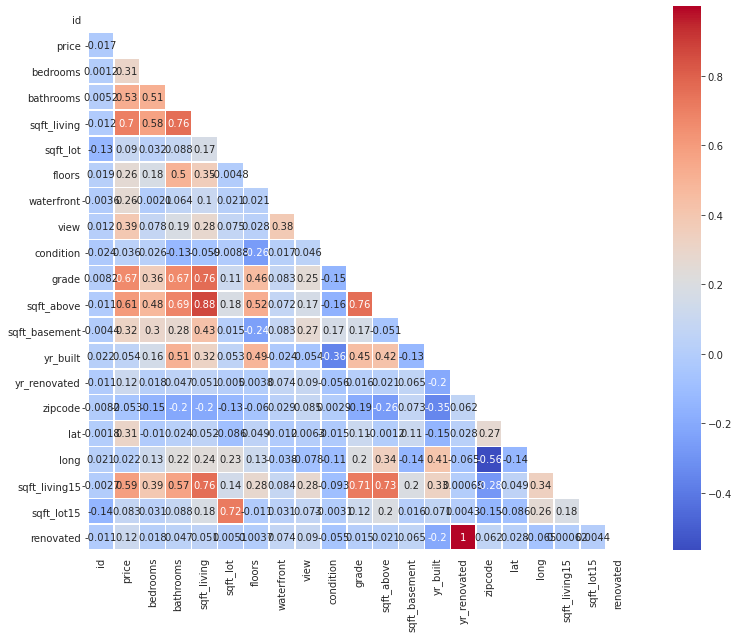

In [41]:
mask = np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(15, 10))
    ax = sns.heatmap(df.corr(), mask=mask, cmap='coolwarm',
                     linewidths=.5, square=True, annot=True)
    

Remove columns to reduce of multicollinearity

In [42]:
df_drop1 = df.drop(['sqft_living','sqft_living15','sqft_lot15',
                     'yr_renovated','bathrooms','sqft_above'], axis=1)

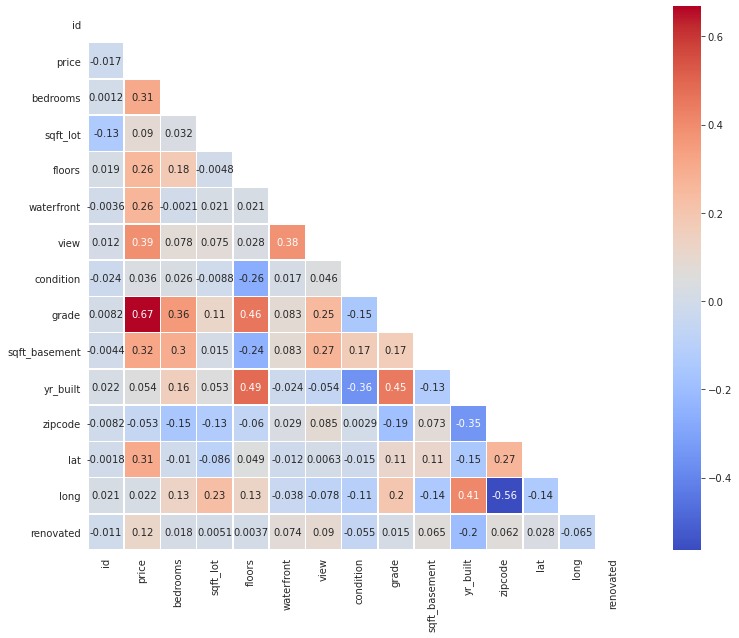

In [43]:
mask = np.zeros_like(df_drop1.corr())
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(15, 10))
    ax = sns.heatmap(df_drop1.corr(), mask=mask, cmap='coolwarm',
                     linewidths=.5, square=True, annot=True)


<hr style="border:1px solid gray"> </hr>

## EDA
- Create visualizations to understand dataset
    - understand the distribution of different columns
    - check for multicollinearity
- Check that the dataset meets the assumptions (for regression)
[//]: # "- Check the balance of the different classes (for classification task)"
[//]: # "- Check that the dataset meets the assumptions (for regression task)"


In [ ]:
from arcgis.gis import GIS
from arcgis.features import GeoAccessor, GeoSeriesAccessor

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelBinarizer

In [16]:
conts = []
cats = []
for col in df.columns:
    if df[col].nunique() < 20:
        cats.append(col)
    else:
        conts.append(col)
print("conts:", conts, "\ncats:", cats)

conts: ['date', 'id', 'price', 'bathrooms', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'] 
cats: ['bedrooms', 'floors', 'waterfront', 'view', 'condition', 'grade', 'year', 'month', 'month_name', 'renovated']


In [17]:
# pd.plotting.scatter_matrix(df[conts], figsize=(12,15));

#### Categorical variables: one-hot encoding

In [22]:
df_conts = df[conts]
df_cats = df[cats]
df_cats.head()

,bedrooms,floors,waterfront,view,condition,grade,year,month,month_name,renovated
0,3,1.0,0.0,0.0,3,7,2014,10,October,0
1,3,2.0,0.0,0.0,3,7,2014,12,December,1
2,2,1.0,0.0,0.0,3,6,2015,2,February,0
3,4,1.0,0.0,0.0,5,7,2014,12,December,0
4,3,1.0,0.0,0.0,3,8,2015,2,February,0


In [ ]:
dummy_df_dict = {}
for col in df_cats.columns:
    dummy_df_dict[col] = pd.get_dummies(df_cats, drop_first=True)
    
df_pp = pd.concat([data, [v for k, v in dummy_df_dict]], axis=1)

In [ ]:
# from sklearn.preprocessing import LabelBinarizer

# lb = LabelBinarizer()
# dummies = lb.fit_transform(df_cats)
# dum_df = pd.DataFrame(df_cats, columns=lb.classes_)
# dum_df

#### Continuous variables: dealing with multicollinearity

<hr style="border:1px solid gray"> </hr>

## Model
- Build and tune the model(s)
- Define a threshold for success
- Select ML algorithms to test
- Tune promising algorithms to improve results

In [ ]:
import stasmodels.api as sm
import statsmodels.formula as smf # ols method
from statsmodels.stats.outliers_influence import variance_inflation_factor
import sklearn 

In [ ]:
df['sector_1'] = df.iloc[(df.lat > 122) & (df.long < )]
df['sector_1'] = df.iloc[(df.lat > 122) & (df.long < )]
df['sector_1'] = df.iloc[(df.lat > 122) & (df.long < )]
df['sector_1'] = df.iloc[(df.lat > 122) & (df.long < )]
df['sector_1'] = df.iloc[(df.lat > 122) & (df.long < )]
df['sector_1'] = df.iloc[(df.lat > 122) & (df.long < )]

<hr style="border:1px solid gray"> </hr>

## Interpret Results
- Interpret results of the model(s)
- Communicate results to the stakeholders
- Identify next steps

#### Conclusion

#### Next Steps